In [1]:
# import the necessary packages
import pandas as pd
import contextlib
import numpy as np
from xgboost import XGBRegressor # import XGBRegressor 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from matplotlib import patheffects
import seaborn as sns
import pickle
import os
import warnings
warnings.filterwarnings("ignore")
import logging
logging.basicConfig(level=logging.INFO)
import sys
import time

In [2]:

# load the data from the 'xlsx' files (for example "C_0.01_stress-strain_data.xlsx")
data = pd.read_excel("C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Stress-strain/Data/C_0.01_stress-strain_data.xlsx")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

data1 = pd.read_excel("C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Stress-strain/Data/SC_0.01_stress-strain_data.xlsx")
X1 = data1.iloc[:, :-1].values
y1 = data1.iloc[:, -1].values

data2 = pd.read_excel("C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Stress-strain/Data/C_0.001_stress-strain_data.xlsx")
X2 = data2.iloc[:, :-1].values
y2 = data2.iloc[:, -1].values

data3 = pd.read_excel("C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Stress-strain/Data/SC_0.001_stress-strain_data.xlsx")
X3 = data3.iloc[:, :-1].values
y3 = data3.iloc[:, -1].values

In [3]:
# split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.25, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.25, random_state=42)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train, y3_train, test_size=0.25, random_state=42)

In [4]:
# define a function to perform hyperparameter tuning using GridSearchCV
def xgb_gridsearch(X_train, y_train, X_val, y_val):
 xgb = XGBRegressor(random_state=42) # use XGBRegressor 
 param_grid = {
 'eta': [0.1, 0.2, 0.4, 0.6], # use eta instead of max_features
 'n_estimators': [10, 20, 50, 100]
 }
 gs = GridSearchCV(xgb, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
 gs.fit(X_train, y_train)
 xgb_best = gs.best_estimator_
 y_val_pred = xgb_best.predict(X_val)
 r2 = r2_score(y_val, y_val_pred)
 rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
 mse = mean_squared_error(y_val, y_val_pred)
 mae = mean_absolute_error(y_val, y_val_pred)
 print("Best parameters: ", gs.best_params_)
 print("R2 score: {:.5f}".format(r2))
 print("RMSE: {:.5f}".format(rmse))
 print("MSE: {:.5f}".format(mse))
 print("MAE: {:.5f}".format(mae))
 return xgb_best

In [5]:
# perform hyperparameter tuning on the training and validation sets for each dataset
xgb_best = xgb_gridsearch(X_train, y_train, X_val, y_val)
xgb_best1 = xgb_gridsearch(X1_train, y1_train, X1_val, y1_val)
xgb_best2 = xgb_gridsearch(X2_train, y2_train, X2_val, y2_val)
xgb_best3 = xgb_gridsearch(X3_train, y3_train, X3_val, y3_val)

Best parameters:  {'eta': 0.6, 'n_estimators': 100}
R2 score: 0.99898
RMSE: 0.09673
MSE: 0.00936
MAE: 0.04395
Best parameters:  {'eta': 0.6, 'n_estimators': 50}
R2 score: 0.99971
RMSE: 0.10121
MSE: 0.01024
MAE: 0.05128
Best parameters:  {'eta': 0.4, 'n_estimators': 100}
R2 score: 0.99962
RMSE: 0.07165
MSE: 0.00513
MAE: 0.03782
Best parameters:  {'eta': 0.6, 'n_estimators': 100}
R2 score: 0.99979
RMSE: 0.08420
MSE: 0.00709
MAE: 0.04616


In [6]:
# train the XGB model on the entire training set using the best hyperparameters for each dataset
xgb = XGBRegressor(learning_rate=xgb_best.learning_rate,n_estimators=xgb_best.n_estimators ,random_state=42) # use learning_rate instead of eta
xgb.fit(X_train,y_train)

xgb1 = XGBRegressor(learning_rate=xgb_best1.learning_rate,n_estimators=xgb_best1.n_estimators ,random_state=42) # use learning_rate instead of eta
xgb1.fit(X1_train,y1_train)

xgb2 = XGBRegressor(learning_rate=xgb_best2.learning_rate,n_estimators=xgb_best2.n_estimators ,random_state=42) # use learning_rate instead of eta
xgb2.fit(X2_train,y2_train)

xgb3 = XGBRegressor(learning_rate=xgb_best3.learning_rate,n_estimators=xgb_best3.n_estimators ,random_state=42) # use learning_rate instead of eta
xgb3.fit(X3_train,y3_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [7]:
# predict the stress-strain for the test set for each dataset
y_pred = xgb.predict(X_test)
y_pred1 = xgb1.predict(X1_test)
y_pred2 = xgb2.predict(X2_test)
y_pred3 = xgb3.predict(X3_test)

In [8]:
# predict the stress-strain for the validation set for each dataset
y_val_pred = xgb.predict(X_val)
y_val_pred1 = xgb1.predict(X1_val)
y_val_pred2 = xgb2.predict(X2_val)
y_val_pred3 = xgb3.predict(X3_val)

In [9]:
from pathlib import Path
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# --- Configure paths ---
# Base folder that contains your Excel files (exactly as in your code)
DATA_DIR = Path(r"C:\Users\gopeami\OneDrive - Vesuvius\Desktop\PhD13- 2025-2026\ML Practice\Material property Design\Stress-strain\Data")

# Where to save the metrics file (sibling "Results" folder next to "Data")
RESULTS_DIR = DATA_DIR.parent / "Results"
RESULTS_DIR.mkdir(parents=True, exist_ok=True)
OUTFILE = RESULTS_DIR / "stress-strain_performance_metrics.txt"

# --- Helper for a single (y_true, y_pred) pair ---
def _metrics(y_true, y_hat):
    y_true = np.asarray(y_true).ravel()
    y_hat  = np.asarray(y_hat).ravel()
    return {
        "R2":   r2_score(y_true, y_hat),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_hat)),
        "MSE":  mean_squared_error(y_true, y_hat),
        "MAE":  mean_absolute_error(y_true, y_hat),
    }

# --- Register datasets and corresponding variables ---
# Fill with your already-computed arrays (as per your variable names).
# Left column is just the on-disk dataset path to echo in the report.
datasets = [
    (DATA_DIR / "C_0.01_stress-strain_data.xlsx",
     {"test": (y_test,  y_pred),   "val": (y_val,  y_val_pred)}),

    (DATA_DIR / "SC_0.01_stress-strain_data.xlsx",
     {"test": (y1_test, y_pred1),  "val": (y1_val, y_val_pred1)}),

    (DATA_DIR / "C_0.001_stress-strain_data.xlsx",
     {"test": (y2_test, y_pred2),  "val": (y2_val, y_val_pred2)}),

    (DATA_DIR / "SC_0.001_stress-strain_data.xlsx",
     {"test": (y3_test, y_pred3),  "val": (y3_val, y_val_pred3)}),
]

# --- Write the report ---
with OUTFILE.open("w", encoding="utf-8") as f:
    for ds_path, splits in datasets:
        f.write(f"Dataset: {ds_path}\n")

        # Test split
        y_tst, yhat_tst = splits["test"]
        m_test = _metrics(y_tst, yhat_tst)
        f.write("Test set performance metrics:\n")
        f.write("  R2 score: {:.5f}\n".format(m_test["R2"]))
        f.write("  RMSE: {:.5f}\n".format(m_test["RMSE"]))
        f.write("  MSE: {:.5f}\n".format(m_test["MSE"]))
        f.write("  MAE: {:.5f}\n".format(m_test["MAE"]))

        # Validation split
        y_vali, yhat_vali = splits["val"]
        m_val = _metrics(y_vali, yhat_vali)
        f.write("Validation set performance metrics:\n")
        f.write("  R2 score: {:.5f}\n".format(m_val["R2"]))
        f.write("  RMSE: {:.5f}\n".format(m_val["RMSE"]))
        f.write("  MSE: {:.5f}\n".format(m_val["MSE"]))
        f.write("  MAE: {:.5f}\n".format(m_val["MAE"]))
        f.write("\n")  # spacer between datasets

print(f"Metrics written to: {OUTFILE}")


Metrics written to: C:\Users\gopeami\OneDrive - Vesuvius\Desktop\PhD13- 2025-2026\ML Practice\Material property Design\Stress-strain\Results\stress-strain_performance_metrics.txt


Saved: C:\Users\gopeami\OneDrive - Vesuvius\Desktop\PhD13- 2025-2026\ML Practice\Material property Design\Stress-strain\Results\plot_C_0p01.png
Saved: C:\Users\gopeami\OneDrive - Vesuvius\Desktop\PhD13- 2025-2026\ML Practice\Material property Design\Stress-strain\Results\plot_SC_0p01.png
Saved: C:\Users\gopeami\OneDrive - Vesuvius\Desktop\PhD13- 2025-2026\ML Practice\Material property Design\Stress-strain\Results\plot_C_0p001.png
Saved: C:\Users\gopeami\OneDrive - Vesuvius\Desktop\PhD13- 2025-2026\ML Practice\Material property Design\Stress-strain\Results\plot_SC_0p001.png


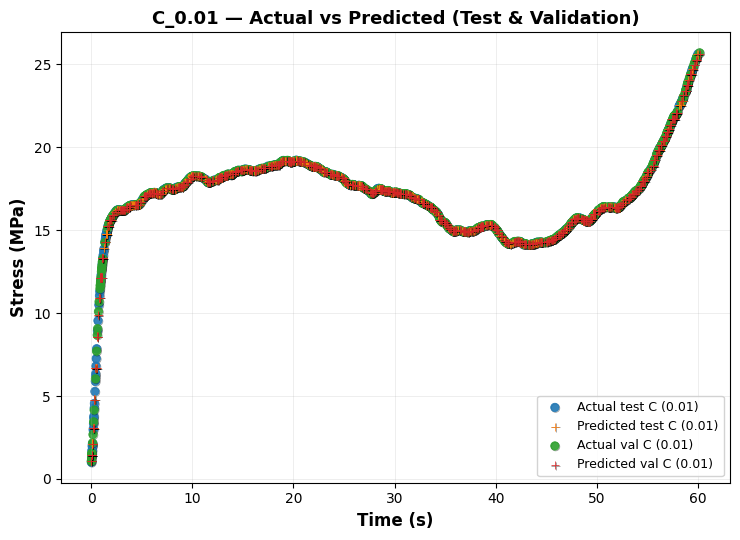

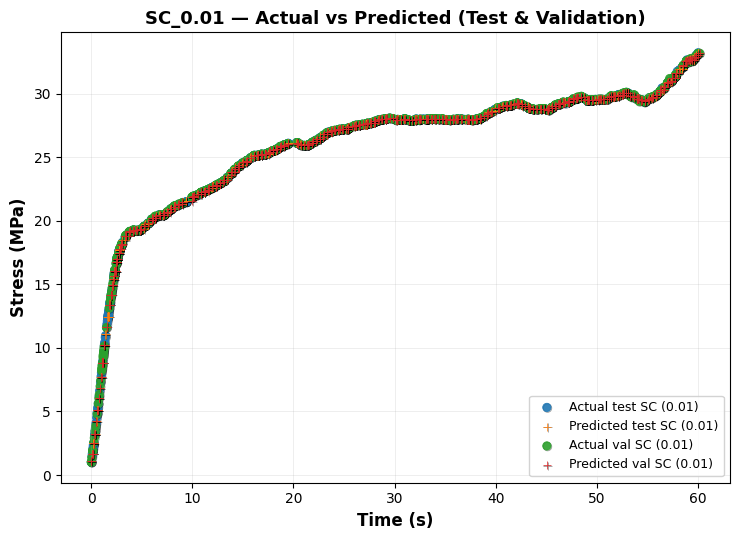

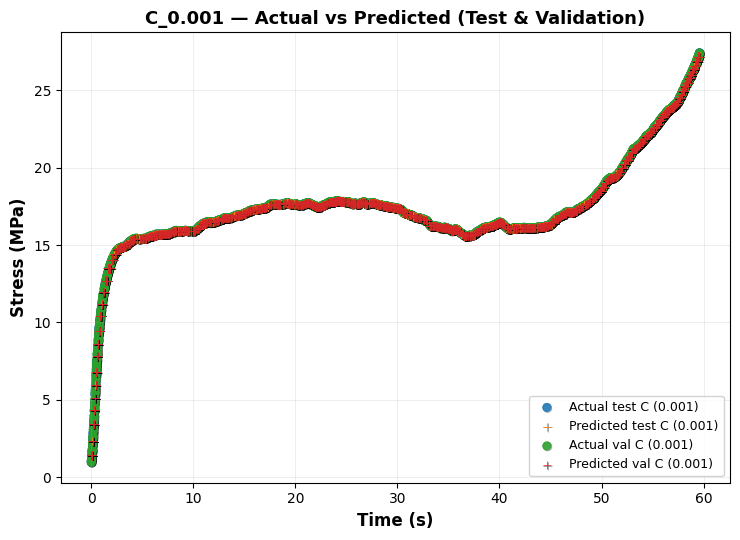

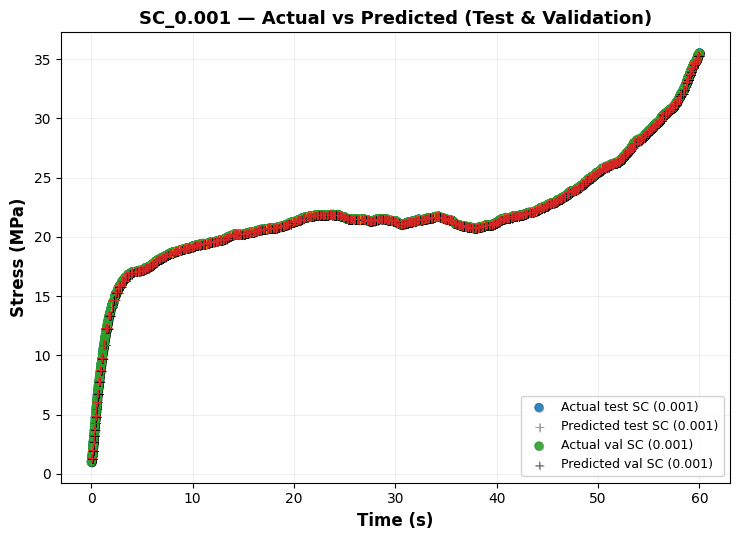

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
from pathlib import Path

# --- Shadow effect: subtle, crisp foreground ---
pe1 = [patheffects.SimpleLineShadow(offset=(0.5, -0.5), alpha=0.4),
       patheffects.Normal()]

# === Configure where to save figures ===
DATA_DIR = Path(r"C:\Users\gopeami\OneDrive - Vesuvius\Desktop\PhD13- 2025-2026\ML Practice\Material property Design\Stress-strain\Data")
RESULTS_DIR = DATA_DIR.parent / "Results"
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

# === Helper to draw one dataset on its own figure ===
def plot_dataset(series, title, xlabel="Time (s)", ylabel="Stress (MPa)", save_name=None):
    fig, ax = plt.subplots(1, 1, figsize=(7.5, 5.5))

    # Plot each series (Actual: 'o', Predicted: '+'), predicted on top for visibility
    for x, y, label, is_pred in series:
        ax.scatter(
            x, y,
            marker=('+' if is_pred else 'o'),
            linewidth=(0.6 if is_pred else 0.6),
            alpha=0.9,
            zorder=(2 if is_pred else 1),
            path_effects=pe1,
            label=label
        )

    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=12, fontweight='bold')   # EDIT if X[:,0] is not time
    ax.set_ylabel(ylabel, fontsize=12, fontweight='bold')   # EDIT if target is not stress
    ax.grid(True, linewidth=0.5, alpha=0.3)
    ax.legend(loc='lower right', fontsize=9, frameon=True, framealpha=0.85)
    fig.tight_layout()

    # Save to Results folder if requested
    if save_name:
        out = RESULTS_DIR / f"{save_name}.png"
        fig.savefig(out, dpi=200, bbox_inches='tight')
        print(f"Saved: {out}")

    return fig, ax

# === Define the four datasets (each becomes its own figure) ===
# Make sure the arrays below already exist in memory:
# C_0.01:   X_test, y_test, y_pred, X_val, y_val, y_val_pred
# SC_0.01:  X1_test, y1_test, y_pred1, X1_val, y1_val, y_val_pred1
# C_0.001:  X2_test, y2_test, y_pred2, X2_val, y2_val, y_val_pred2
# SC_0.001: X3_test, y3_test, y_pred3, X3_val, y3_val, y_val_pred3

datasets = [
    # (Title, SaveName, [(x, y, label, is_pred), ... ])
    (
        "C_0.01 — Actual vs Predicted (Test & Validation)",
        "plot_C_0p01",
        [
            (X_test[:, 0], y_test,       "Actual test C (0.01)",      False),
            (X_test[:, 0], y_pred,       "Predicted test C (0.01)",   True),
            (X_val[:,  0], y_val,        "Actual val C (0.01)",       False),
            (X_val[:,  0], y_val_pred,   "Predicted val C (0.01)",    True),
        ],
    ),
    (
        "SC_0.01 — Actual vs Predicted (Test & Validation)",
        "plot_SC_0p01",
        [
            (X1_test[:, 0], y1_test,     "Actual test SC (0.01)",     False),
            (X1_test[:, 0], y_pred1,     "Predicted test SC (0.01)",  True),
            (X1_val[:,  0], y1_val,      "Actual val SC (0.01)",      False),
            (X1_val[:,  0], y_val_pred1, "Predicted val SC (0.01)",   True),
        ],
    ),
    (
        "C_0.001 — Actual vs Predicted (Test & Validation)",
        "plot_C_0p001",
        [
            (X2_test[:, 0], y2_test,     "Actual test C (0.001)",     False),
            (X2_test[:, 0], y_pred2,     "Predicted test C (0.001)",  True),
            (X2_val[:,  0], y2_val,      "Actual val C (0.001)",      False),
            (X2_val[:,  0], y_val_pred2, "Predicted val C (0.001)",   True),
        ],
    ),
    (
        "SC_0.001 — Actual vs Predicted (Test & Validation)",
        "plot_SC_0p001",
        [
            (X3_test[:, 0], y3_test,     "Actual test SC (0.001)",    False),
            (X3_test[:, 0], y_pred3,     "Predicted test SC (0.001)", True),
            (X3_val[:,  0], y3_val,      "Actual val SC (0.001)",     False),
            (X3_val[:,  0], y_val_pred3, "Predicted val SC (0.001)",  True),
        ],
    ),
]

# === Render the four separate figures ===
# If X[:,0] is not time, update the axis labels below accordingly (e.g., "Strain (%)" on x-axis).
for title, save_name, series in datasets:
    plot_dataset(series, title, xlabel="Time (s)", ylabel="Stress (MPa)", save_name=save_name)

plt.show()


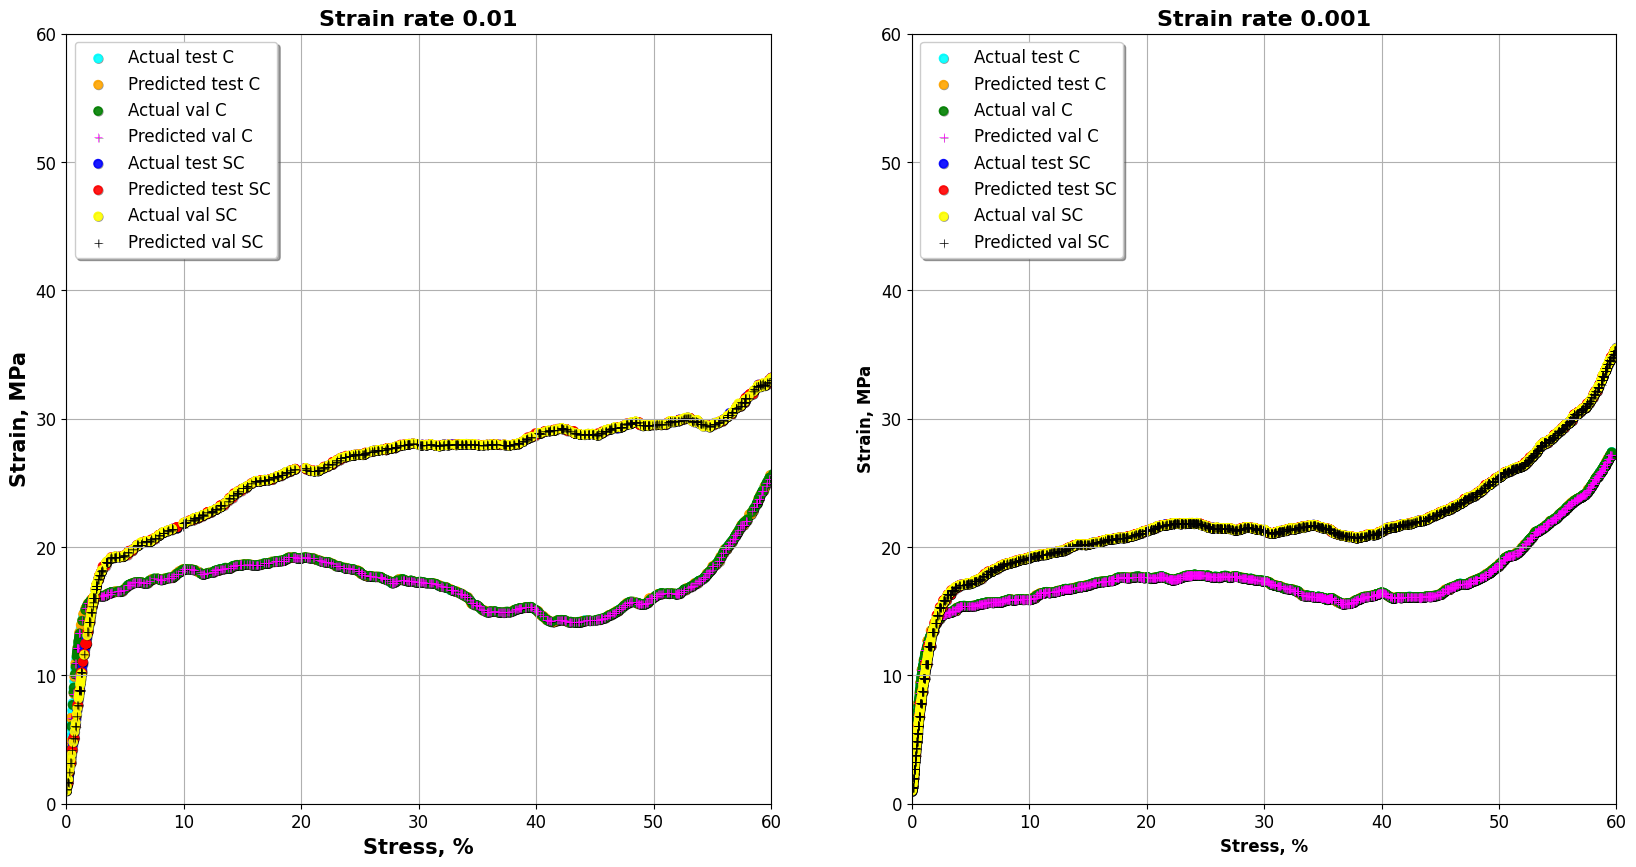

In [11]:
# Shadow effect objects with different transparency and smaller linewidth
pe1 = [patheffects.SimpleLineShadow(offset=(0.5,-0.5), alpha=0.4), patheffects.Normal()]

# create two subplots for the two multiplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot of the actual vs predicted stress-strain as a function of  time for the first multiplot
ax1.scatter(X_test[:, 0], y_test,color='cyan',label='Actual test C', linewidth=1,alpha=0.9,zorder=1,path_effects=pe1)
ax1.scatter(X_test[:, 0], y_pred,color='orange',label='Predicted test C', linewidth=1,alpha=0.9,zorder=1,path_effects=pe1)
ax1.scatter(X_val[:, 0], y_val,color='green',label='Actual val C', linewidth=1,alpha=0.9,zorder=1,path_effects=pe1)
ax1.scatter(X_val[:, 0], y_val_pred,color='magenta',label='Predicted val C', linewidth=0.5,alpha=0.9,zorder=1,marker='+',path_effects=pe1)
ax1.scatter(X1_test[:, 0], y1_test,color='blue',label='Actual test SC', linewidth=1,alpha=0.9,zorder=1,path_effects=pe1)
ax1.scatter(X1_test[:, 0], y_pred1,color='red',label='Predicted test SC', linewidth=1,alpha=0.9,zorder=1,path_effects=pe1)
ax1.scatter(X1_val[:, 0], y1_val,color='yellow',label='Actual val SC', linewidth=1,alpha=0.9,zorder=1,path_effects=pe1)
ax1.scatter(X1_val[:, 0], y_val_pred1,color='black',label='Predicted val SC', linewidth=0.5,alpha=0.9,zorder=1,marker='+',path_effects=pe1)
ax1.set_xlabel('Stress, %', fontsize='15', fontweight='bold')
ax1.set_ylabel('Strain, MPa', fontsize='15', fontweight='bold')
ax1.legend(loc='lower right')

# Add title
ax1.set_title("Strain rate 0.01", fontsize='16', fontweight='bold')

# Add a legend with shadow and different font size 
ax1.legend(shadow=True, prop={'size':'12'}, loc='upper left')
# Set the x axis limit to 60
ax1.set_xlim(0, 60) # use set_xlim instead of xlim
# Set the y axis limit to 60
ax1.set_ylim(0, 60) # use set_ylim instead of ylim
# Change the axes numbering size and font
ax1.tick_params(axis='both', which='major', labelsize=12, labelcolor='black')
ax1.grid() # add grid to the second subplot

# Plot of the actual vs predicted stress-strain as a function of  time for the second multiplot
ax2.scatter(X2_test[:, 0], y2_test,color='cyan',label='Actual test C', linewidth=1,alpha=0.9,zorder=1,path_effects=pe1)
ax2.scatter(X2_test[:, 0], y_pred2,color='orange',label='Predicted test C', linewidth=1,alpha=0.9,zorder=1,path_effects=pe1)
ax2.scatter(X2_val[:, 0], y2_val,color='green',label='Actual val C', linewidth=1,alpha=0.9,zorder=1,path_effects=pe1)
ax2.scatter(X2_val[:, 0], y_val_pred2,color='magenta',label='Predicted val C', linewidth=0.5,alpha=0.9,zorder=1,marker='+',path_effects=pe1)
ax2.scatter(X3_test[:, 0], y3_test,color='blue',label='Actual test SC', linewidth=1,alpha=0.9,zorder=1,path_effects=pe1)
ax2.scatter(X3_test[:, 0], y_pred3,color='red',label='Predicted test SC', linewidth=1,alpha=0.9,zorder=1,path_effects=pe1)
ax2.scatter(X3_val[:, 0], y3_val,color='yellow',label='Actual val SC', linewidth=1,alpha=0.9,zorder=1,path_effects=pe1)
ax2.scatter(X3_val[:, 0], y_val_pred3,color='black',label='Predicted val SC', linewidth=0.5,alpha=0.9,zorder=1,marker='+',path_effects=pe1)
ax2.set_xlabel('Stress, %', fontsize='12', fontweight='bold')
ax2.set_ylabel('Strain, MPa', fontsize='12', fontweight='bold')

# Add title
ax2.set_title("Strain rate 0.001",fontsize='16', fontweight='bold')

# Add a legend with shadow and different font size 
ax2.legend(shadow=True, prop={'size':'12'}, loc='upper left')
# Set the x axis limit to 60
ax2.set_xlim(0, 60) # use set_xlim instead of xlim
# Set the y axis limit to 60
ax2.set_ylim(0, 60) # use set_ylim instead of ylim
# Change the axes numbering size and font
ax2.tick_params(axis='both', which='major', labelsize=12, labelcolor='black')
ax2.grid() # add grid to the second subplot


# Save the plot with dpi=500 in 'png'
fig.savefig('C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Stress-strain/Results/pred_stress-strain_c_multi.png', dpi=500)

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects

# --- Shadow effect objects (same as your code) ---
pe1 = [patheffects.SimpleLineShadow(offset=(0.5, -0.5), alpha=0.4),
       patheffects.Normal()]

# --- Output base path (edit if you prefer another folder/name) ---
OUTDIR = r"C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Stress-strain/Results"

def make_single_dataset_plot(
    x_test, y_test, y_pred_test,
    x_val,  y_val,  y_pred_val,
    title, outfile,
    xlabel='Stress, %', ylabel='Strain, MPa',
    xlim=(0, 60), ylim=(0, 60)
):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))

    # Test (C/SC colors from your convention)
    ax.scatter(x_test, y_test,      color='cyan',   label='Actual test',    linewidth=1, alpha=0.9, zorder=1, path_effects=pe1)
    ax.scatter(x_test, y_pred_test, color='orange', label='Predicted test', linewidth=1, alpha=0.9, zorder=1, path_effects=pe1)

    # Validation
    ax.scatter(x_val,  y_val,       color='green',   label='Actual val',    linewidth=1,   alpha=0.9, zorder=1, path_effects=pe1)
    ax.scatter(x_val,  y_pred_val,  color='magenta', label='Predicted val', linewidth=0.5, alpha=0.9, zorder=1, marker='+', path_effects=pe1)

    # Axes, legend, grid
    ax.set_xlabel(xlabel, fontsize=15, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=15, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold')

    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.tick_params(axis='both', which='major', labelsize=12, labelcolor='black')
    ax.grid(True)

    # Legend with shadow
    ax.legend(shadow=True, prop={'size': '12'}, loc='upper left')

    fig.tight_layout()
    fig.savefig(f"{OUTDIR}/{outfile}", dpi=500, bbox_inches='tight')
    plt.close(fig)

# =========================
# Per-dataset figures
# =========================

# 1) C_0.01
make_single_dataset_plot(
    X_test[:, 0], y_test, y_pred,
    X_val[:, 0],  y_val,  y_val_pred,
    title="C_0.01 — Strain rate 0.01",
    outfile="pred_stress-strain_C_0p01.png",
    xlabel='Stress, %', ylabel='Strain, MPa',
    xlim=(0,60), ylim=(0,60)
)

# 2) SC_0.01
make_single_dataset_plot(
    X1_test[:, 0], y1_test, y_pred1,
    X1_val[:, 0],  y1_val,  y_val_pred1,
    title="SC_0.01 — Strain rate 0.01",
    outfile="pred_stress-strain_SC_0p01.png",
    xlabel='Stress, %', ylabel='Strain, MPa',
    xlim=(0,60), ylim=(0,60)
)

# 3) C_0.001
make_single_dataset_plot(
    X2_test[:, 0], y2_test, y_pred2,
    X2_val[:, 0],  y2_val,  y_val_pred2,
    title="C_0.001 — Strain rate 0.001",
    outfile="pred_stress-strain_C_0p001.png",
    xlabel='Stress, %', ylabel='Strain, MPa',
    xlim=(0,60), ylim=(0,60)
)

# 4) SC_0.001
make_single_dataset_plot(
    X3_test[:, 0], y3_test, y_pred3,
    X3_val[:, 0],  y3_val,  y_val_pred3,
    title="SC_0.001 — Strain rate 0.001",
    outfile="pred_stress-strain_SC_0p001.png",
    xlabel='Stress, %', ylabel='Strain, MPa',
    xlim=(0,60), ylim=(0,60)
)


In [12]:
# create a DataFrame from the variables for each dataset
df1 = pd.DataFrame({"Actual test": y_test, "Predicted test": y_pred, "Actual val": y_val, "Predicted val": y_val_pred})
df2 = pd.DataFrame({"Actual test": y1_test, "Predicted test": y_pred1, "Actual val": y1_val, "Predicted val": y_val_pred1})
df3 = pd.DataFrame({"Actual test": y2_test, "Predicted test": y_pred2, "Actual val": y2_val, "Predicted val": y_val_pred2})
df4 = pd.DataFrame({"Actual test": y3_test, "Predicted test": y_pred3, "Actual val": y3_val, "Predicted val": y_val_pred3})

# save the DataFrames to an Excel file with different sheets
with pd.ExcelWriter("C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Stress-strain/Results/pred_stress-strain_multi.xlsx") as writer:
 df1.to_excel(writer, sheet_name="C_0.01", index=False)
 df2.to_excel(writer, sheet_name="SC_0.01", index=False)
 df3.to_excel(writer, sheet_name="C_0.001", index=False)
 df4.to_excel(writer, sheet_name="SC_0.001", index=False)

In [13]:
# Descriptive statistics

# create a DataFrame from the descriptive statistics for each dataset
df1_stats = df1.describe()
df2_stats = df2.describe()
df3_stats = df3.describe()
df4_stats = df4.describe()

# rename the labels of the rows
df1_stats = df1_stats.rename(index={'50%': 'median'})
df2_stats = df2_stats.rename(index={'50%': 'median'})
df3_stats = df3_stats.rename(index={'50%': 'median'})
df4_stats = df4_stats.rename(index={'50%': 'median'})

In [14]:
# select only the standard deviation, mean, median, minimum, and maximum from each DataFrame
df1_stats = df1_stats.loc[['std', 'mean', 'median', 'min', 'max']]
df2_stats = df2_stats.loc[['std', 'mean', 'median', 'min', 'max']]
df3_stats = df3_stats.loc[['std', 'mean', 'median', 'min', 'max']]
df4_stats = df4_stats.loc[['std', 'mean', 'median', 'min', 'max']]

In [15]:
# print the selected statistics for each DataFrame
print("Statistics for C_0.01_stress-strain_data.xlsx")
print(df1_stats)
print("Statistics for SC_0.01_stress-strain_data.xlsx")
print(df2_stats)
print("Statistics for C_0.001_stress-strain_data.xlsx")
print(df3_stats)
print("Statistics for SC_0.001_stress-strain_data.xlsx")
print(df4_stats)

Statistics for C_0.01_stress-strain_data.xlsx
        Actual test  Predicted test  Actual val  Predicted val
std        3.357325        3.360310    3.025462       3.023787
mean      16.782195       16.776871   16.878762      16.877150
median    17.268998       17.268141   17.197872      17.194986
min        1.006614        1.095428    1.067995       1.095428
max       25.633947       25.607416   25.704160      25.607416
Statistics for SC_0.01_stress-strain_data.xlsx
        Actual test  Predicted test  Actual val  Predicted val
std        6.531127        6.536989    5.919444       5.924016
mean      24.578200       24.573160   25.545213      25.540649
median    27.233104       27.216976   27.945794      27.965883
min        1.004100        1.115680    1.017203       1.115680
max       33.222354       33.199593   33.188499      33.199593
Statistics for C_0.001_stress-strain_data.xlsx
        Actual test  Predicted test  Actual val  Predicted val
std        3.873034        3.874332    3.

In [16]:
# save the DataFrames to an Excel file with different sheets
with pd.ExcelWriter("C:/Users/gopeami/OneDrive - Vesuvius/Desktop/PhD13- 2025-2026/ML Practice/Material property Design/Stress-strain/Results/statistics_stress-strain.xlsx") as writer:
 df1_stats.to_excel(writer, sheet_name="C_0.01", index=True) # use index=True to write the row names
 df2_stats.to_excel(writer, sheet_name="SC_0.01", index=True) # use index=True to write the row names
 df3_stats.to_excel(writer, sheet_name="C_0.001", index=True) # use index=True to write the row names
 df4_stats.to_excel(writer, sheet_name="SC_0.001", index=True) # use index=True to write the row names

# Predicting Stress–Strain Behavior - ML Models

Saved summary metrics -> Results\visual_summary_metrics.csv


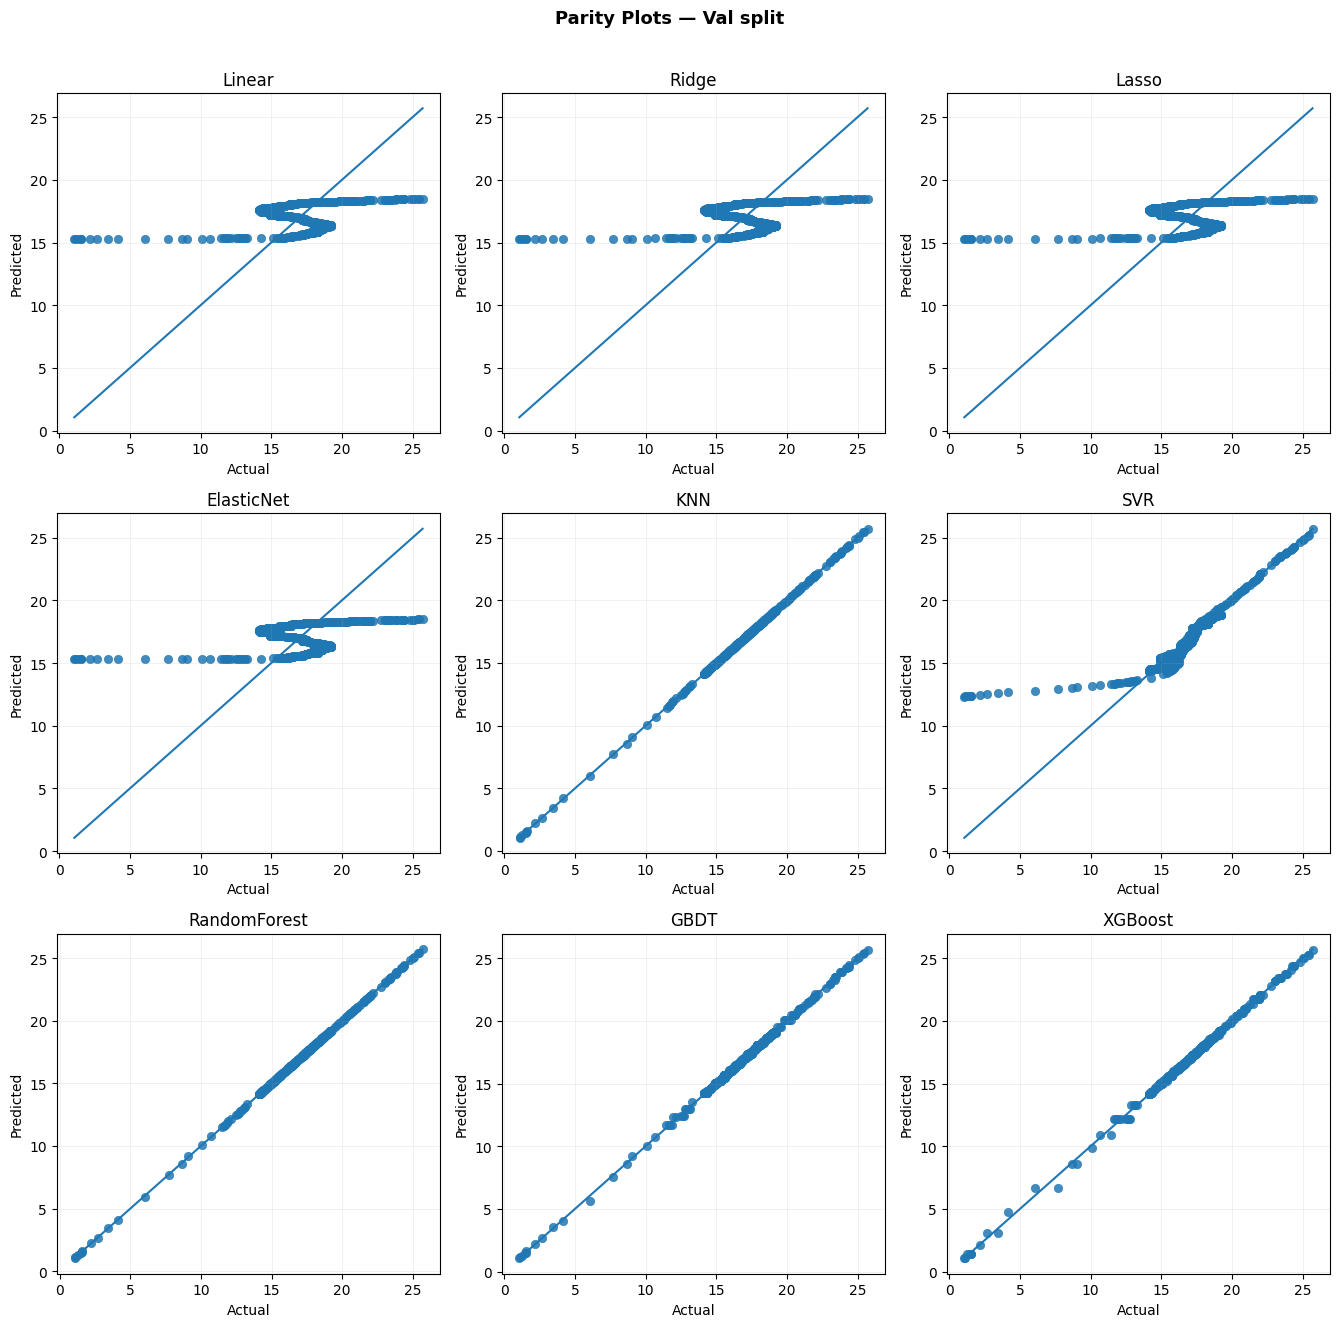

Saved -> Results\figures\parity_grid_val.png


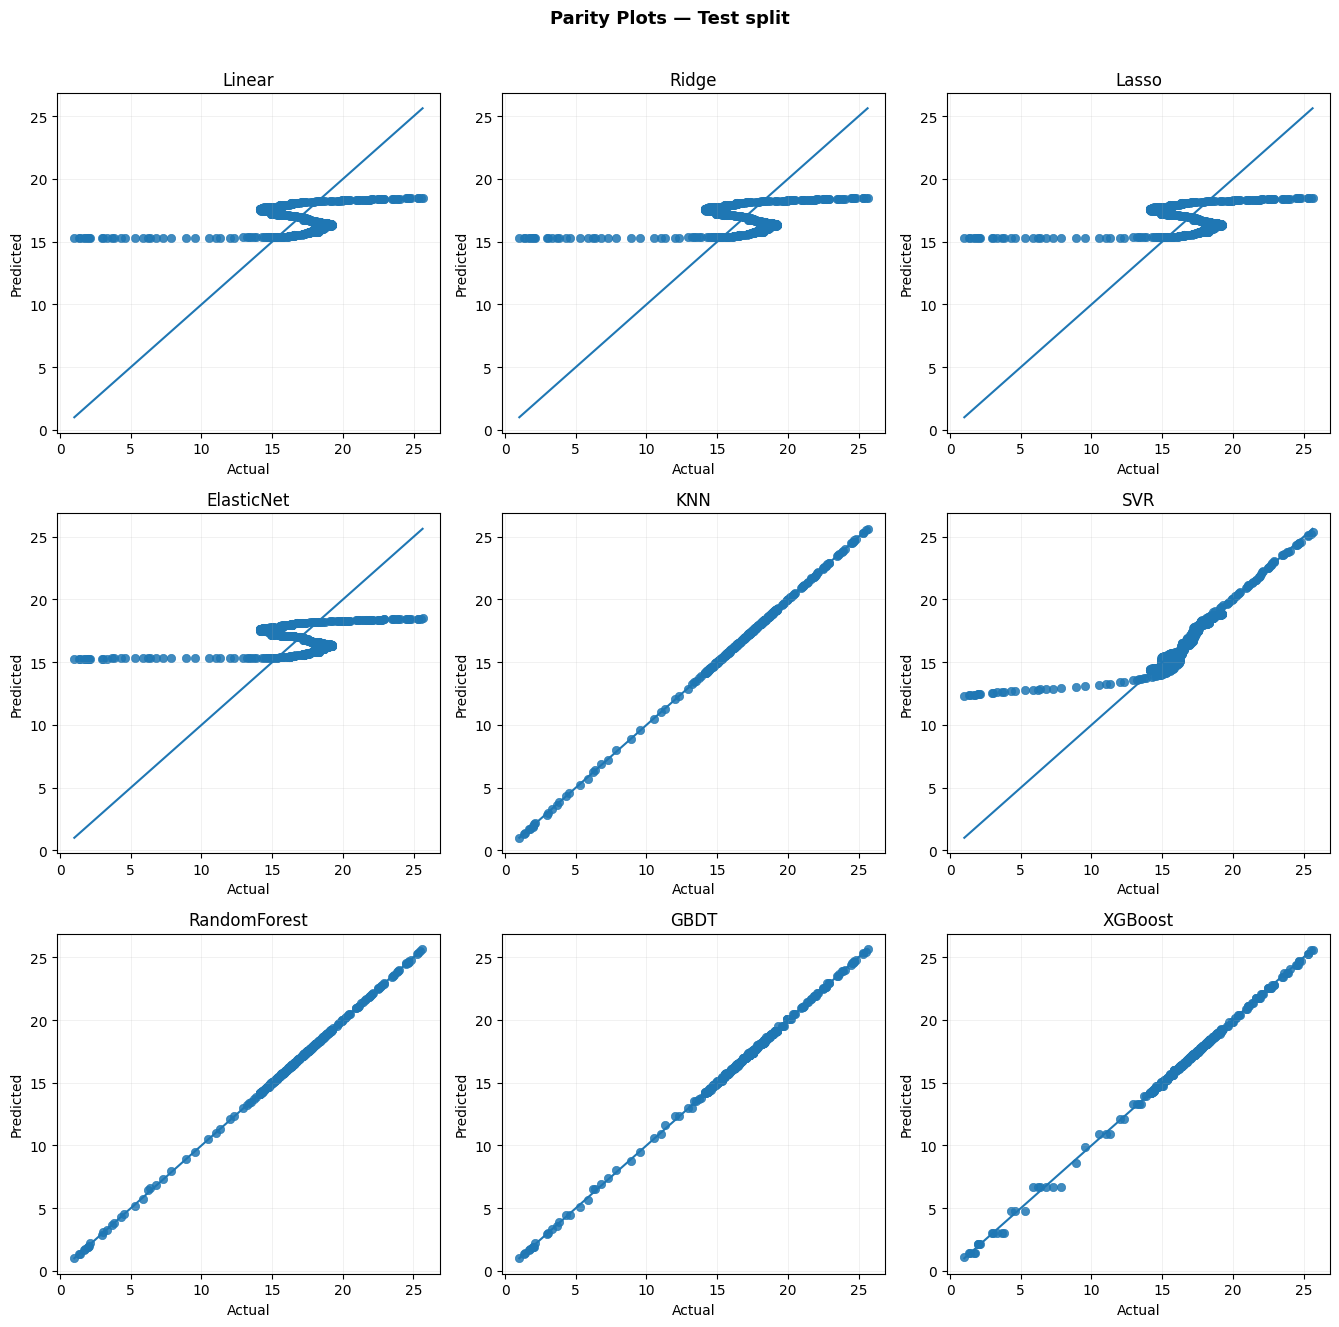

Saved -> Results\figures\parity_grid_test.png


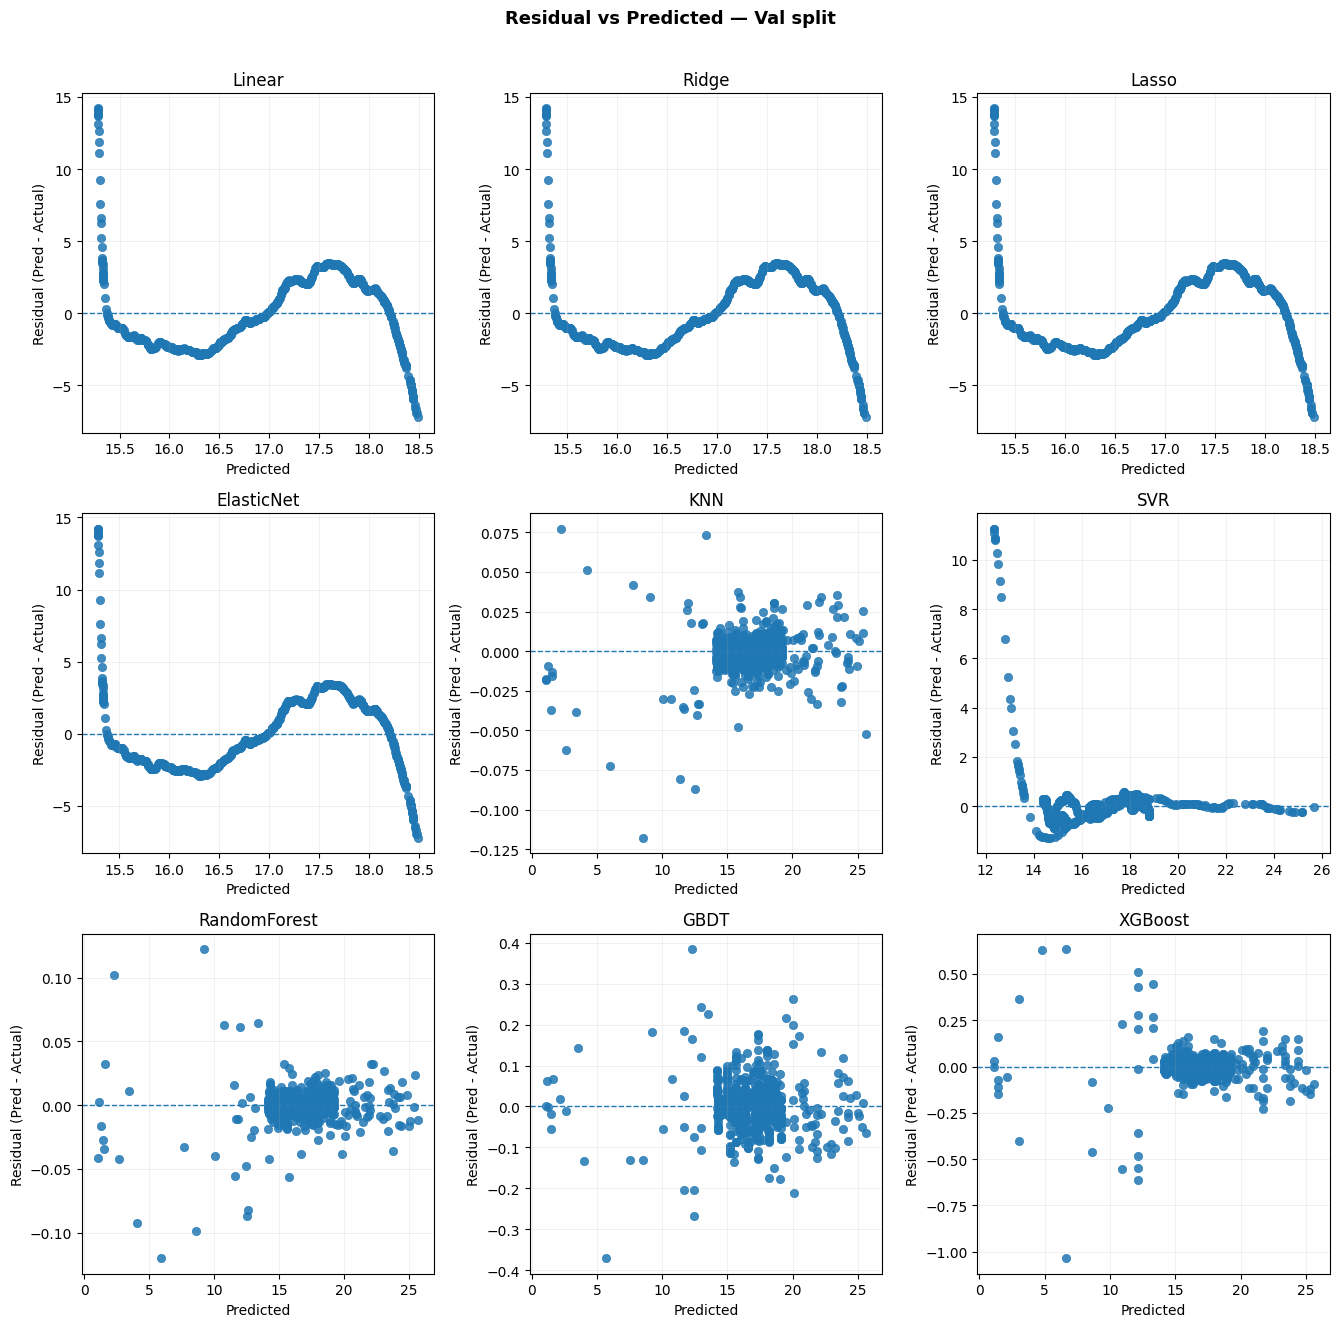

Saved -> Results\figures\residual_vs_pred_grid_val.png


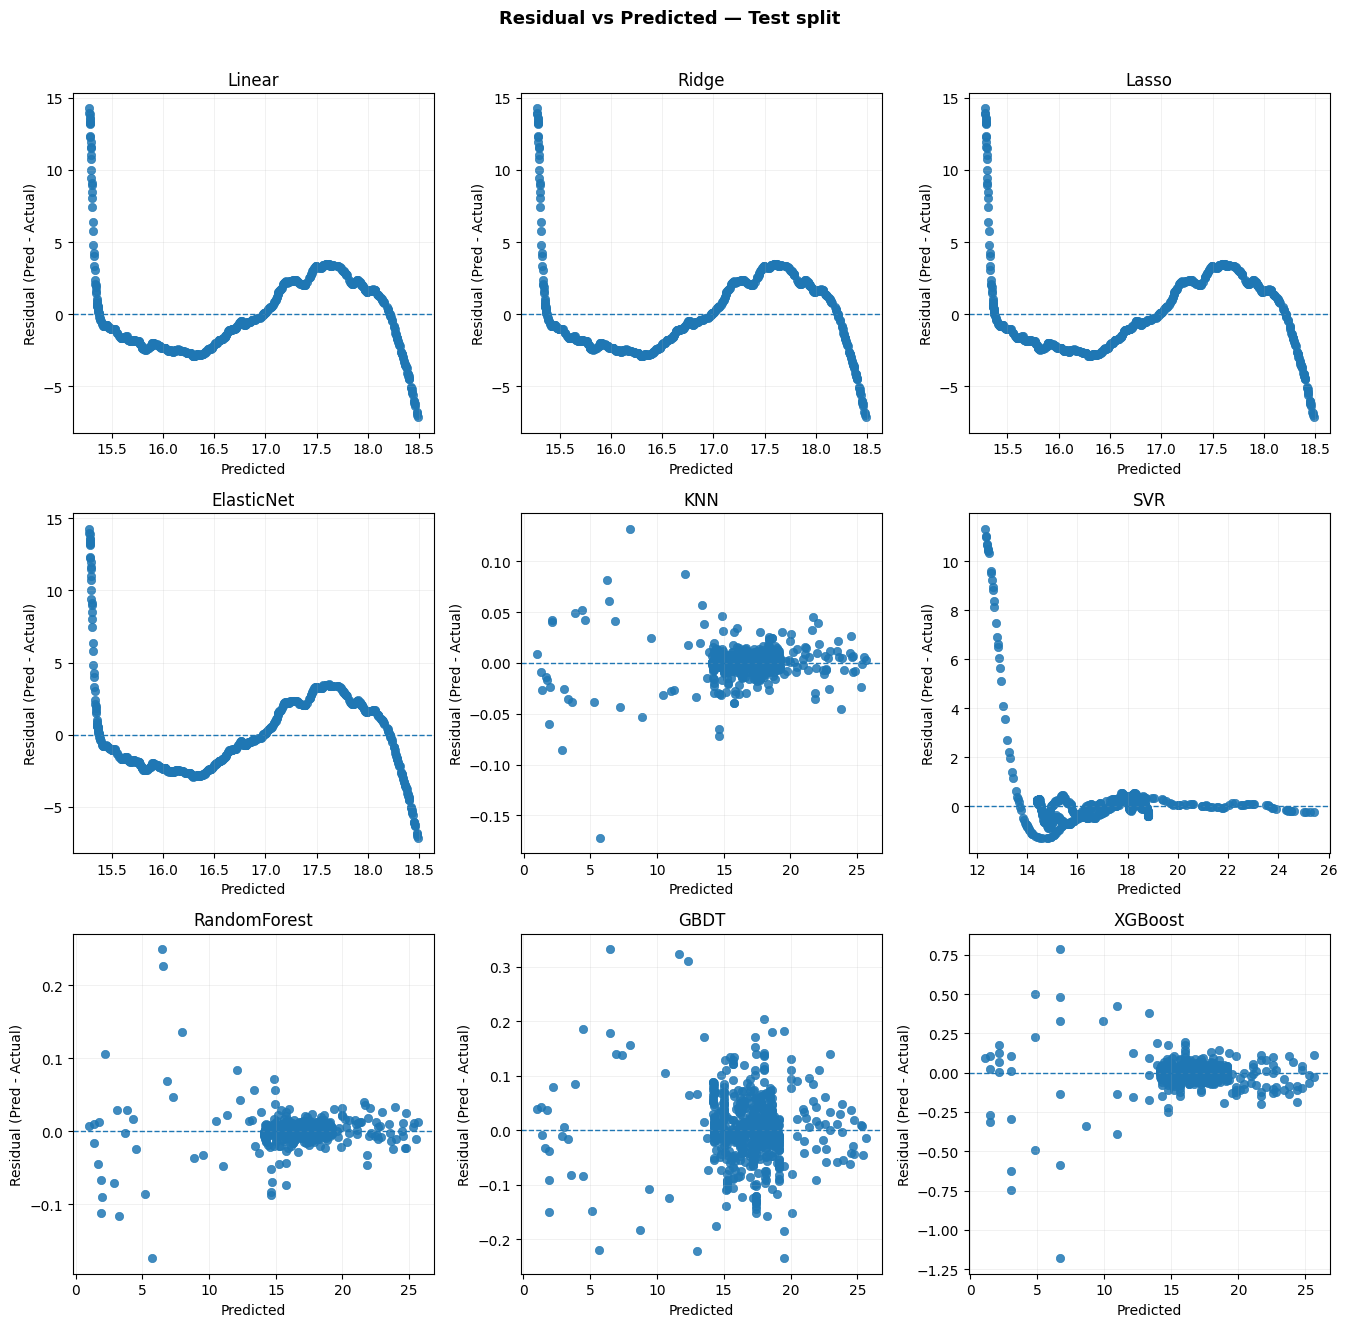

Saved -> Results\figures\residual_vs_pred_grid_test.png
Saved -> Results\figures\abs_error_box_val.png


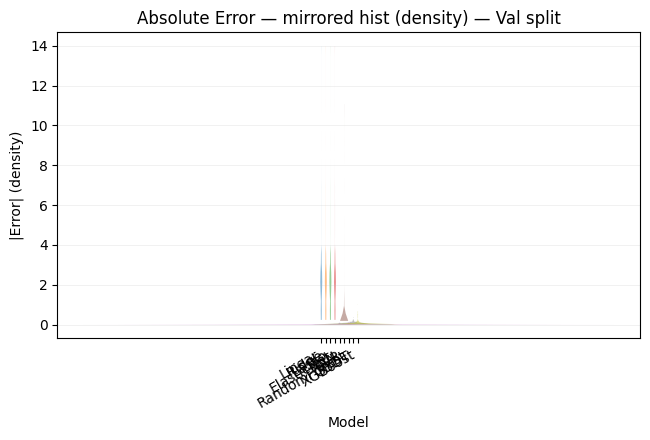

Saved -> Results\figures\abs_error_mirrored_hist_val.png
Saved -> Results\figures\abs_error_box_test.png


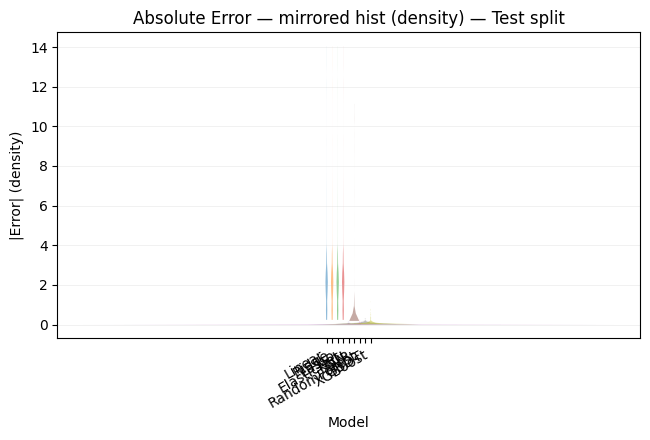

Saved -> Results\figures\abs_error_mirrored_hist_test.png


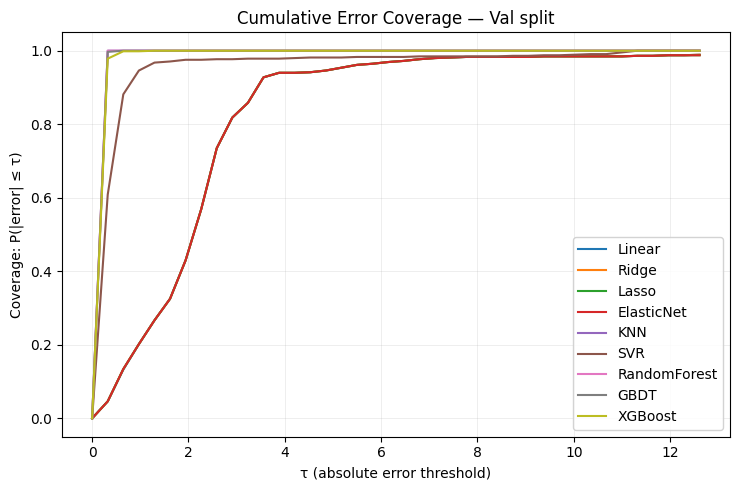

Saved -> Results\figures\coverage_curve_val.png


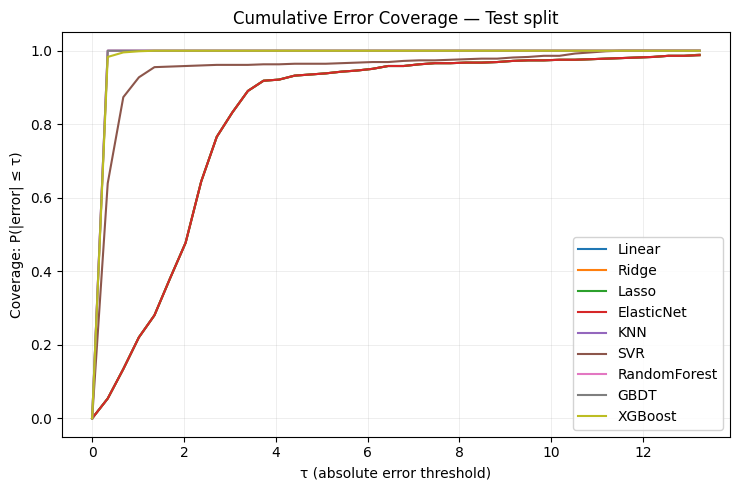

Saved -> Results\figures\coverage_curve_test.png


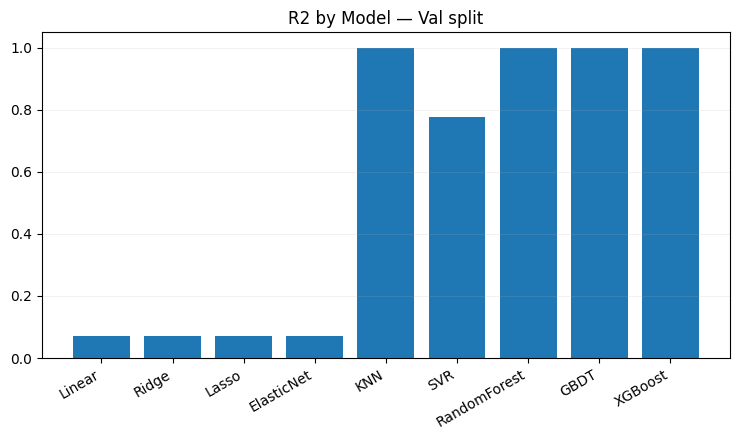

Saved -> Results\figures\metric_bar_R2_val.png


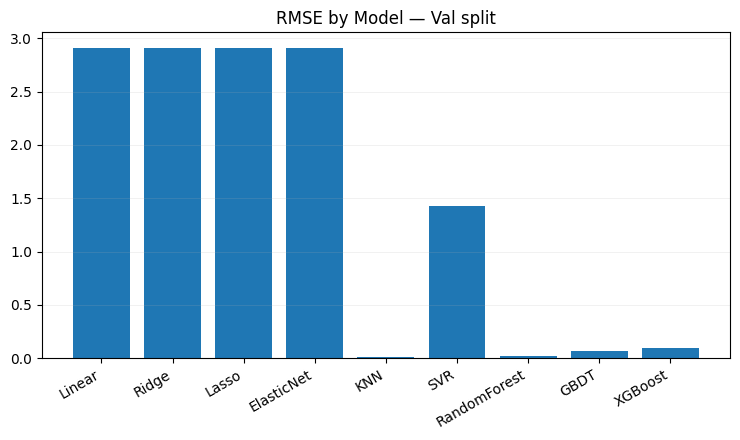

Saved -> Results\figures\metric_bar_RMSE_val.png


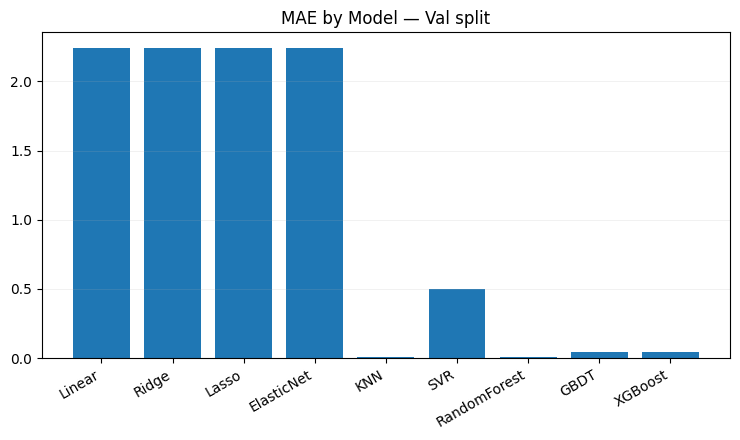

Saved -> Results\figures\metric_bar_MAE_val.png


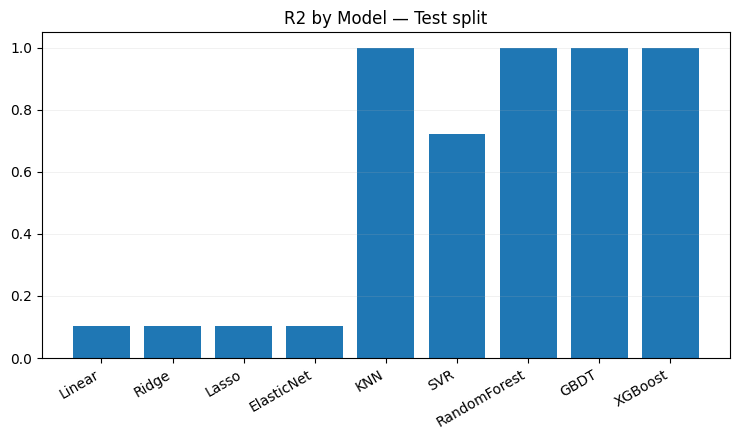

Saved -> Results\figures\metric_bar_R2_test.png


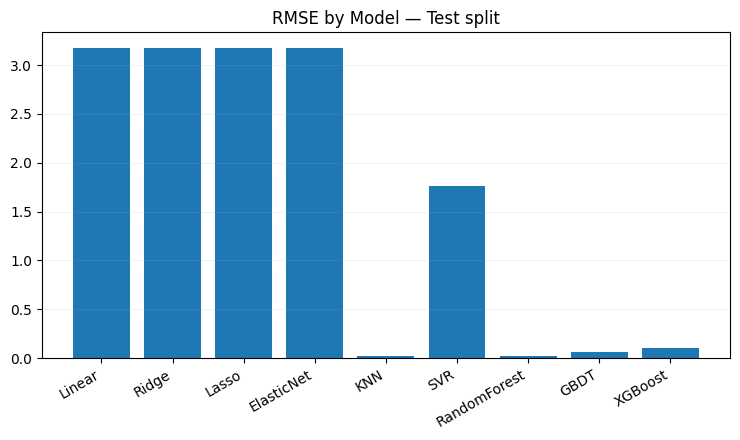

Saved -> Results\figures\metric_bar_RMSE_test.png


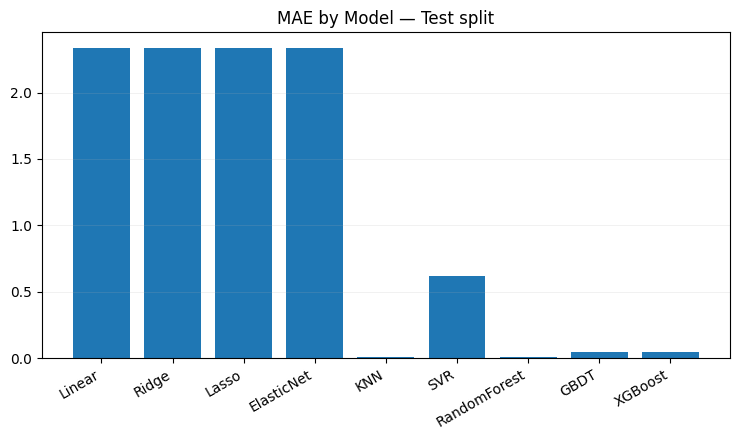

Saved -> Results\figures\metric_bar_MAE_test.png


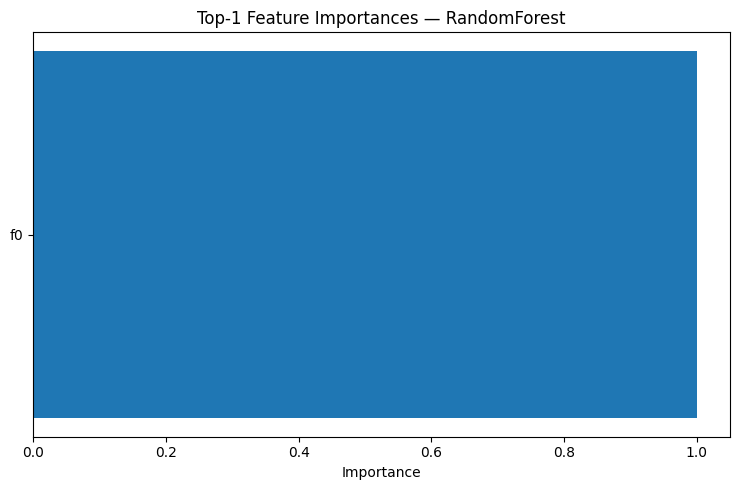

Saved -> Results\figures\feature_importance_RandomForest.png


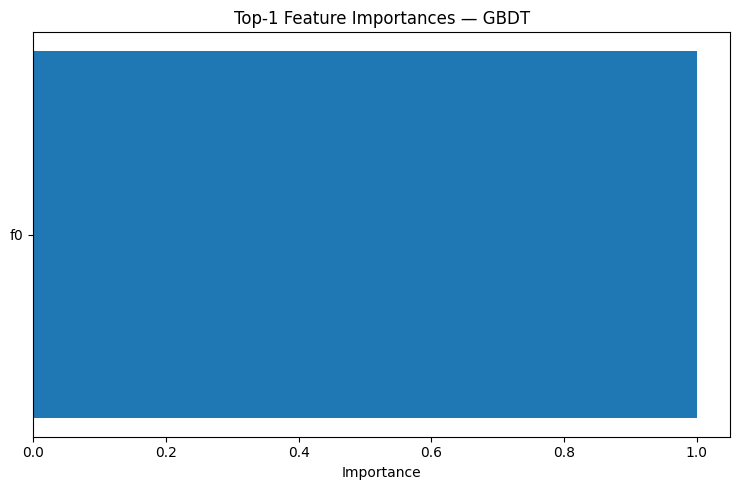

Saved -> Results\figures\feature_importance_GBDT.png


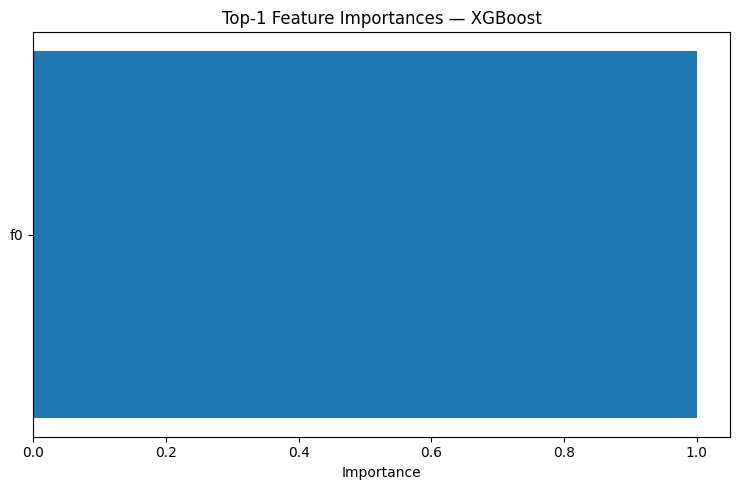

Saved -> Results\figures\feature_importance_XGBoost.png


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
try:
    from xgboost import XGBRegressor
    HAS_XGB = True
except Exception:
    HAS_XGB = False

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ---------- Configuration ----------
RESULTS_DIR = Path("Results")
FIG_DIR = RESULTS_DIR / "figures"
FIG_DIR.mkdir(parents=True, exist_ok=True)

# Label knobs (edit to match your units/semantics)
XLABEL_FEAT = "Time (s)"        # if you later plot feature-vs-target
YLABEL_TGT  = "Stress (MPa)"    # your target label (if target is strain, change here)

# ---------- Models (same as comparison block; add XGBoost if desired) ----------
models = {
    "Linear":        LinearRegression(),
    "Ridge":         Ridge(alpha=1.0, random_state=42),
    "Lasso":         Lasso(alpha=1e-3, random_state=42, max_iter=20000),
    "ElasticNet":    ElasticNet(alpha=1e-3, l1_ratio=0.5, random_state=42, max_iter=20000),
    "KNN":           KNeighborsRegressor(n_neighbors=7, weights="distance"),
    "SVR":           SVR(C=10.0, epsilon=0.1, kernel="rbf"),
    "RandomForest":  RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1),
    "GBDT":          GradientBoostingRegressor(random_state=42),
}
if HAS_XGB:
    models["XGBoost"] = XGBRegressor(
        n_estimators=800, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8,
        objective="reg:squarederror", random_state=42, n_jobs=-1
    )

# ---------- Fit all models, gather predictions/errors ----------
def collect_predictions(models_dict):
    rows = []
    per_point = []  # long-form for distributions and residual plots

    for name, base_model in models_dict.items():
        pipe = Pipeline([("scaler", StandardScaler()), ("model", base_model)])
        pipe.fit(X_train, y_train)

        for split_name, (X_split, y_split) in {
            "val":  (X_val,  y_val),
            "test": (X_test, y_test)
        }.items():
            y_hat = pipe.predict(X_split)
            r2  = r2_score(y_split, y_hat)
            rmse = float(np.sqrt(mean_squared_error(y_split, y_hat)))
            mae  = float(mean_absolute_error(y_split, y_hat))

            rows.append({"Model": name, "Split": split_name, "R2": r2, "RMSE": rmse, "MAE": mae})

            # per-point storage
            per_point.append(pd.DataFrame({
                "Model": name,
                "Split": split_name,
                "Actual": y_split,
                "Pred": y_hat,
                "Error": y_hat - y_split,
                "AbsError": np.abs(y_hat - y_split),
            }))

    summary = pd.DataFrame(rows)
    long_df = pd.concat(per_point, ignore_index=True)
    return summary, long_df

summary_df, long_df = collect_predictions(models)

# Save summary table for reference
summary_csv = RESULTS_DIR / "visual_summary_metrics.csv"
summary_df.to_csv(summary_csv, index=False)
print(f"Saved summary metrics -> {summary_csv}")

# ---------- 1) Parity (Actual vs Predicted) grids ----------
def parity_grid(df_long, split, n_cols=3):
    d = df_long[df_long["Split"] == split]
    models_list = d["Model"].unique().tolist()
    n = len(models_list)
    n_rows = int(np.ceil(n / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4.5*n_cols, 4.5*n_rows))
    axes = np.atleast_1d(axes).ravel()

    for ax, model_name in zip(axes, models_list):
        dd = d[d["Model"] == model_name]
        ax.scatter(dd["Actual"], dd["Pred"], alpha=0.85, linewidth=0.5)
        lo = min(dd["Actual"].min(), dd["Pred"].min())
        hi = max(dd["Actual"].max(), dd["Pred"].max())
        ax.plot([lo, hi], [lo, hi])
        ax.set_title(model_name)
        ax.set_xlabel("Actual")
        ax.set_ylabel("Predicted")
        ax.grid(True, linewidth=0.4, alpha=0.3)

    # hide empty axes
    for j in range(len(models_list), len(axes)):
        axes[j].axis("off")

    fig.suptitle(f"Parity Plots — {split.capitalize()} split", fontsize=13, fontweight="bold")
    fig.tight_layout(rect=[0,0,1,0.97])
    out = FIG_DIR / f"parity_grid_{split}.png"
    fig.savefig(out, dpi=200, bbox_inches="tight"); plt.show(fig)
    print(f"Saved -> {out}")

parity_grid(long_df, "val")
parity_grid(long_df, "test")

# ---------- 2) Residual vs Predicted grids (heteroscedasticity) ----------
def resid_vs_pred_grid(df_long, split, n_cols=3):
    d = df_long[df_long["Split"] == split]
    models_list = d["Model"].unique().tolist()
    n = len(models_list)
    n_rows = int(np.ceil(n / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4.5*n_cols, 4.5*n_rows))
    axes = np.atleast_1d(axes).ravel()

    for ax, model_name in zip(axes, models_list):
        dd = d[d["Model"] == model_name]
        ax.scatter(dd["Pred"], dd["Error"], alpha=0.85, linewidth=0.5)
        ax.axhline(0.0, linestyle="--", linewidth=1.0)
        ax.set_title(model_name)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Residual (Pred - Actual)")
        ax.grid(True, linewidth=0.4, alpha=0.3)

    for j in range(len(models_list), len(axes)):
        axes[j].axis("off")

    fig.suptitle(f"Residual vs Predicted — {split.capitalize()} split", fontsize=13, fontweight="bold")
    fig.tight_layout(rect=[0,0,1,0.97])
    out = FIG_DIR / f"residual_vs_pred_grid_{split}.png"
    fig.savefig(out, dpi=200, bbox_inches="tight"); plt.show(fig)
    print(f"Saved -> {out}")

resid_vs_pred_grid(long_df, "val")
resid_vs_pred_grid(long_df, "test")

# ---------- 3) Absolute-error distributions per model ----------
def abs_error_distributions(df_long, split):
    d = df_long[df_long["Split"] == split]
    models_list = d["Model"].unique().tolist()

    # Box plot
    fig, ax = plt.subplots(figsize=(1.2 + 0.6*len(models_list), 4.5))
    data = [d[d["Model"] == m]["AbsError"].values for m in models_list]
    ax.boxplot(data, labels=models_list, showfliers=False)
    ax.set_ylabel("|Error|")
    ax.set_title(f"Absolute Error Distribution — {split.capitalize()} split")
    ax.grid(True, linewidth=0.4, alpha=0.3, axis="y")
    fig.tight_layout()
    out = FIG_DIR / f"abs_error_box_{split}.png"
    fig.savefig(out, dpi=200, bbox_inches="tight"); plt.close(fig)
    print(f"Saved -> {out}")

    # Mirrored hist (violin-like feel without seaborn)
    bins = 30
    fig, ax = plt.subplots(figsize=(1.2 + 0.6*len(models_list), 4.5))
    for i, m in enumerate(models_list, start=1):
        vals = d[d["Model"] == m]["AbsError"].values
        hist, edges = np.histogram(vals, bins=bins, density=True)
        centers = 0.5*(edges[:-1] + edges[1:])
        # plot mirrored horizontal bars
        ax.fill_betweenx(centers, i - hist/2, i + hist/2, alpha=0.5)
    ax.set_xticks(range(1, len(models_list)+1))
    ax.set_xticklabels(models_list, rotation=30, ha="right")
    ax.set_xlabel("Model")
    ax.set_ylabel("|Error| (density)")
    ax.set_title(f"Absolute Error — mirrored hist (density) — {split.capitalize()} split")
    ax.grid(True, linewidth=0.4, alpha=0.3, axis="y")
    fig.tight_layout()
    out = FIG_DIR / f"abs_error_mirrored_hist_{split}.png"
    fig.savefig(out, dpi=200, bbox_inches="tight"); plt.show(fig)
    print(f"Saved -> {out}")

abs_error_distributions(long_df, "val")
abs_error_distributions(long_df, "test")

# ---------- 4) Cumulative error coverage (fraction within |error| <= τ) ----------
def coverage_curve(df_long, split, taus=None):
    if taus is None:
        # auto-range from empirical errors
        errs = df_long[df_long["Split"]==split]["AbsError"].values
        max_e = np.percentile(errs, 99.5)  # robust cap
        taus = np.linspace(0, max_e, 40)

    d = df_long[df_long["Split"] == split]
    models_list = d["Model"].unique().tolist()

    fig, ax = plt.subplots(figsize=(7.5, 5.0))
    for m in models_list:
        vals = d[d["Model"] == m]["AbsError"].values
        cov = [(vals <= t).mean() for t in taus]
        ax.plot(taus, cov, label=m)
    ax.set_xlabel("τ (absolute error threshold)")
    ax.set_ylabel("Coverage: P(|error| ≤ τ)")
    ax.set_title(f"Cumulative Error Coverage — {split.capitalize()} split")
    ax.grid(True, linewidth=0.5, alpha=0.3)
    ax.legend(frameon=True, framealpha=0.85)
    fig.tight_layout()
    out = FIG_DIR / f"coverage_curve_{split}.png"
    fig.savefig(out, dpi=200, bbox_inches="tight"); plt.show(fig)
    print(f"Saved -> {out}")

coverage_curve(long_df, "val")
coverage_curve(long_df, "test")

# ---------- 5) Metric bars (R², RMSE, MAE) side-by-side ----------
def metric_bars(df_summary, split):
    d = df_summary[df_summary["Split"] == split].copy()
    metrics = ["R2", "RMSE", "MAE"]
    for metric in metrics:
        fig, ax = plt.subplots(figsize=(7.5, 4.5))
        ax.bar(d["Model"], d[metric])
        ax.set_title(f"{metric} by Model — {split.capitalize()} split")
        ax.set_xticklabels(d["Model"], rotation=30, ha="right")
        ax.grid(True, linewidth=0.4, alpha=0.3, axis="y")
        fig.tight_layout()
        out = FIG_DIR / f"metric_bar_{metric}_{split}.png"
        fig.savefig(out, dpi=200, bbox_inches="tight"); plt.show(fig)
        print(f"Saved -> {out}")

metric_bars(summary_df, "val")
metric_bars(summary_df, "test")

# ---------- 6) Feature importance (tree models) ----------
def feature_importance_tree(models_dict):
    # Refit to full train for stable importances; StandardScaler does not affect trees
    for name, base_model in models_dict.items():
        if not any(k in name for k in ["RandomForest", "GBDT", "XGBoost"]):
            continue
        pipe = Pipeline([("scaler", StandardScaler()), ("model", base_model)])
        pipe.fit(X_train, y_train)

        model = pipe.named_steps["model"]
        if hasattr(model, "feature_importances_"):
            importances = model.feature_importances_
        else:
            continue

        # If you know your feature names, set them here. If X_train is a DataFrame, use its columns.
        if hasattr(X_train, "columns"):
            feat_names = list(X_train.columns)
        else:
            feat_names = [f"f{i}" for i in range(len(importances))]

        order = np.argsort(importances)[::-1]
        k = min(20, len(order))
        top_idx = order[:k]

        fig, ax = plt.subplots(figsize=(7.5, 5.0))
        ax.barh([feat_names[i] for i in top_idx][::-1], importances[top_idx][::-1])
        ax.set_title(f"Top-{k} Feature Importances — {name}")
        ax.set_xlabel("Importance")
        fig.tight_layout()
        out = FIG_DIR / f"feature_importance_{name}.png"
        fig.savefig(out, dpi=200, bbox_inches="tight"); plt.show(fig)
        print(f"Saved -> {out}")

feature_importance_tree(models)
